In [1]:
!pip install -q tensorflow

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

from tensorflow.keras import datasets, layers, models

In [3]:
tf.__version__

'2.17.1'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - accuracy: 0.8903 - loss: 0.3433 - val_accuracy: 0.9833 - val_loss: 0.0506
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 127s 36ms/step - accuracy: 0.9853 - loss: 0.0479 - val_accuracy: 0.9856 - val_loss: 0.0427
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9895 - loss: 0.0326 - val_accuracy: 0.9908 - val_loss: 0.0305
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9922 - loss: 0.0248 - val_accuracy: 0.9876 - val_loss: 0.0421
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9945 - loss: 0.0184 - val_accuracy: 0.9890 - val_loss: 0.0345


In [10]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [11]:
classes = [0,1,2,3,4,5,6,7,8,9]

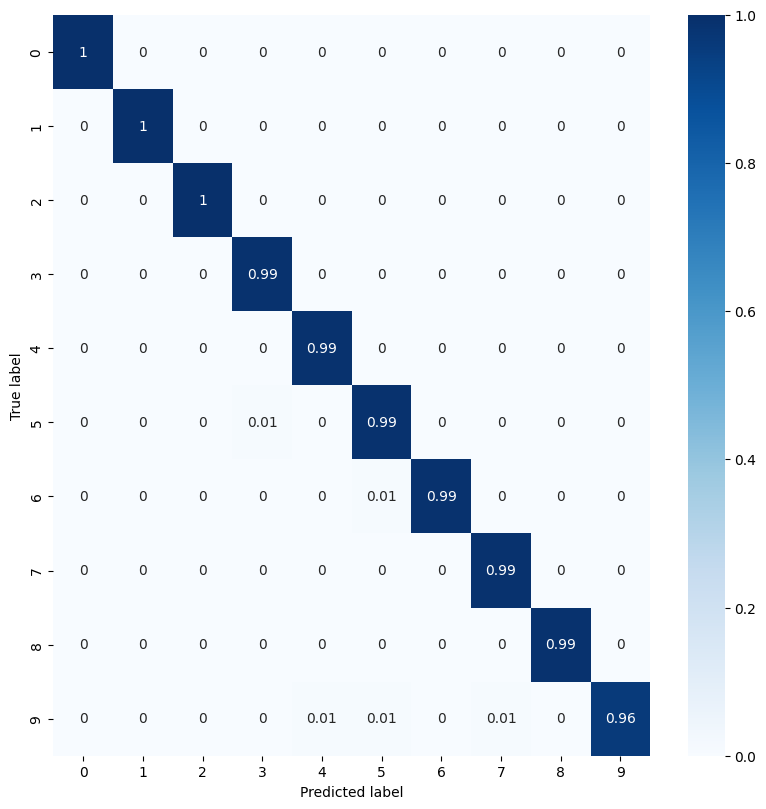

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
# Importando bibliotecas
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix
)

In [14]:
# Função para calcular especificidade
def calcular_especificidade(y_true, y_pred):
    """Calcula a especificidade com base na matriz de confusão."""
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    especificidade = tn / (tn + fp) if (tn + fp) > 0 else 0
    return especificidade


# Função para plotar a matriz de confusão
def plotar_matriz_confusao(y_true, y_pred, classes):
    """Plota a matriz de confusão normalizada."""
    cm = confusion_matrix(y_true, y_pred)
    cm_normalizado = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_df = pd.DataFrame(cm_normalizado, index=classes, columns=classes)


    plt.figure(figsize=(8, 8))
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Matriz de Confusão Normalizada')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


# Função para plotar a curva ROC
def plotar_curva_roc(y_true, y_scores):
    """Plota a curva ROC e calcula a AUC."""
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)


    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Curva ROC')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


# Função para calcular e exibir métricas de classificação de forma separada
def avaliar_metrica_separada(nome, valor):
    print(f"{nome}: {valor:.2f}")


# Função principal para avaliar classificação
def avaliar_classificacao(y_true, y_pred, y_scores, classes):
    print("Métricas de Classificação:")
    acuracia = accuracy_score(y_true, y_pred)
    precisao = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    especificidade = calcular_especificidade(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='binary')


    avaliar_metrica_separada("Acurácia", acuracia)
    avaliar_metrica_separada("Precisão", precisao)
    avaliar_metrica_separada("Sensibilidade (Recall)", recall)
    avaliar_metrica_separada("Especificidade", especificidade)
    avaliar_metrica_separada("F1-Score", f1)


    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_true, y_pred))


    plotar_matriz_confusao(y_true, y_pred, classes)
    plotar_curva_roc(y_true, y_scores)

Métricas de Classificação:
Acurácia: 0.71
Precisão: 0.75
Sensibilidade (Recall): 0.75
Especificidade: 0.67
F1-Score: 0.75

Matriz de Confusão:
[[2 1]
 [1 3]]


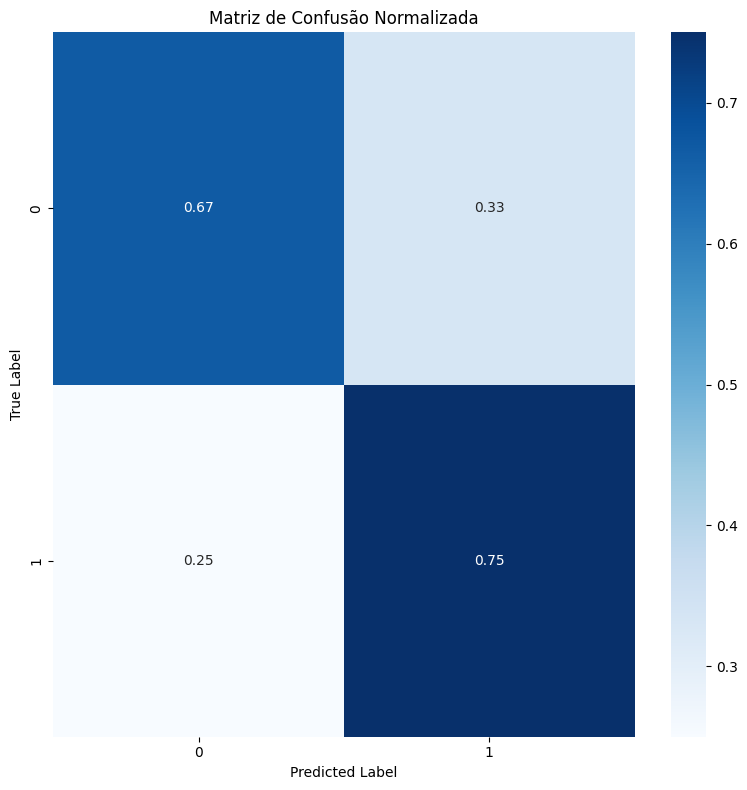

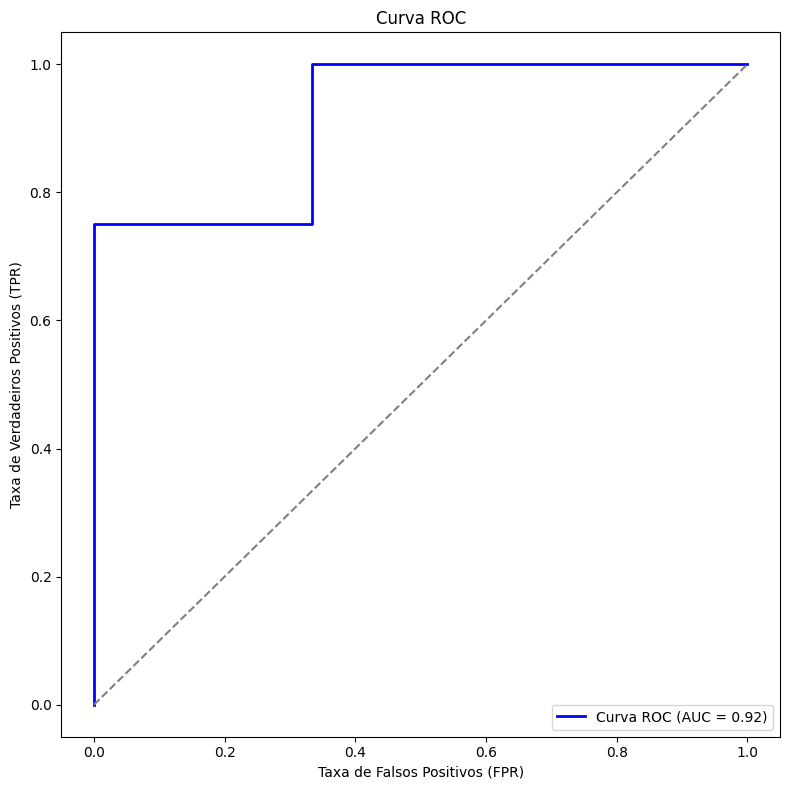

In [15]:
# Código de exemplo em Google Colab
if __name__ == "__main__":
    # Dados fictícios para exemplo de classificação
    y_true_clf = [0, 1, 1, 0, 1, 0, 1]
    y_pred_clf = [0, 1, 0, 0, 1, 1, 1]
    y_scores_clf = [0.1, 0.9, 0.4, 0.3, 0.8, 0.7, 0.9]  # Pontuações preditivas
    classes = [0, 1]


    # Avaliação do modelo
    avaliar_classificacao(y_true_clf, y_pred_clf, y_scores_clf, classes)